## Import Libraries


In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [79]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

## Read prognostic breast cancer data

In [25]:
# df = pd.read_csv("/content/drive/MyDrive/CSE587/wpbc_data_3.csv")
df_scaled = pd.read_csv("wpbc_data_3.csv")

In [26]:
df.head()

,id,diagnosis,time_for_recurrence,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,tumor_size,lymph_node_status
0,119513,N,31,18.02,27.60,117.50,1013.0,0.09489,0.1036,0.1086,...,139.70,1436.0,0.1195,0.1926,0.3140,0.1170,0.2677,0.08113,5.0,5
1,8423,N,61,17.99,10.38,122.80,1001.0,0.11840,0.2776,0.3001,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,3.0,2
2,842517,N,116,21.37,17.44,137.50,1373.0,0.08836,0.1189,0.1255,...,159.10,1949.0,0.1188,0.3449,0.3414,0.2032,0.4334,0.09067,2.5,0
3,843483,N,123,11.42,20.38,77.58,386.1,0.14250,0.2839,0.2414,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,2.0,0
4,843584,R,27,20.29,14.34,135.10,1297.0,0.10030,0.1328,0.1980,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,3.5,0


### View Data dimensions

In [27]:
df.shape

(198, 35)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       198 non-null    int64  
 1   diagnosis                198 non-null    object 
 2   time_for_recurrence      198 non-null    int64  
 3   radius_mean              198 non-null    float64
 4   texture_mean             198 non-null    float64
 5   perimeter_mean           198 non-null    float64
 6   area_mean                198 non-null    float64
 7   smoothness_mean          198 non-null    float64
 8   compactness_mean         198 non-null    float64
 9   concavity_mean           198 non-null    float64
 10  concave points_mean      198 non-null    float64
 11  symmetry_mean            198 non-null    float64
 12  fractal_dimension_mean   198 non-null    float64
 13  radius_se                198 non-null    float64
 14  texture_se               1

In [32]:
df['lymph_node_status'].unique()

array([ 5.,  2.,  0., 10.,  1., 20.,  6., 13.,  4., 17., 15., 11.,  9.,
        8.,  7.,  3., 14., 27., 24., 18., 16., 21.])

Lymph Node status column has object data instead of float. It is because of the '?' value that is present instead of a missing value. We need to remove that and treat this column like a numeric column.

In [30]:
df['lymph_node_status'].replace('?',0, inplace = True)
df['lymph_node_status']= df['lymph_node_status'].astype(float)

### View summary of all numeric columns in data

In [33]:
df.describe()

,id,time_for_recurrence,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,tumor_size,lymph_node_status
count,1.980000e+02,198.000000,198.000000,198.00000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,...,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000
mean,1.990469e+06,46.732323,17.412323,22.27601,114.856566,970.040909,0.102681,0.142648,0.156243,0.086776,...,140.347778,1404.958586,0.143921,0.365102,0.436685,0.178778,0.323404,0.090828,2.847475,3.146465
std,2.889025e+06,34.462870,3.161676,4.29829,21.383402,352.149215,0.012522,0.049898,0.070572,0.033877,...,28.892279,586.006972,0.022004,0.163965,0.173625,0.045181,0.075161,0.021172,1.937964,5.442245
min,8.423000e+03,1.000000,10.950000,10.38000,71.900000,361.600000,0.074970,0.046050,0.023980,0.020310,...,85.100000,508.100000,0.081910,0.051310,0.023980,0.028990,0.156500,0.055040,0.400000,0.000000
25%,8.557452e+05,14.000000,15.052500,19.41250,98.160000,702.525000,0.093900,0.110200,0.106850,0.063670,...,118.075000,947.275000,0.129325,0.248700,0.322150,0.152650,0.275950,0.076577,1.500000,0.000000
50%,8.863390e+05,39.500000,17.290000,21.75000,113.700000,929.100000,0.101900,0.131750,0.151350,0.086075,...,136.500000,1295.000000,0.141850,0.351300,0.402350,0.179250,0.310300,0.086890,2.500000,1.000000
75%,9.279958e+05,72.750000,19.580000,24.65500,129.650000,1193.500000,0.110975,0.172200,0.200500,0.103925,...,159.875000,1694.250000,0.154875,0.423675,0.541050,0.207125,0.358800,0.101375,3.500000,4.000000
max,9.411300e+06,125.000000,27.220000,39.28000,182.100000,2250.000000,0.144700,0.311400,0.426800,0.201200,...,232.200000,3903.000000,0.222600,1.058000,1.170000,0.290300,0.663800,0.207500,10.000000,27.000000


## Find level of the data

Let's check if any of the existing columns is the level of the data. If not a combination of columns can be the level of the data.

Here level of data means the primary/composite key of the dataset used to uniquely identify each row in the dataset

In [35]:
df.nunique()

id                         198
diagnosis                    2
time_for_recurrence         95
radius_mean                177
texture_mean               193
perimeter_mean             181
area_mean                  192
smoothness_mean            179
compactness_mean           192
concavity_mean             196
concave points_mean        189
symmetry_mean              175
fractal_dimension_mean     194
radius_se                  196
texture_se                 191
perimeter_se               192
area_se                    196
smoothness_se              196
compactness_se             193
concavity_se               192
concave points_se          187
symmetry_se                189
fractal_dimension_se       195
radius_worst               182
texture_worst              187
perimeter_worst            183
area_worst                 191
smoothness_worst           172
compactness_worst          191
concavity_worst            197
concave points_worst       185
symmetry_worst             192
fractal_

We can see that each row in the dataset can we uniquely identified using the id column. So id is the level of our dataset

## Check the dataset for NA values

In [9]:
df.isna().sum()

id                         0
diagnosis                  0
time_for_recurrence        0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
tumor_size                 0
lymph_node_sta

There are no NA values in our dataset. This means we do not have to perform any missing value treatment.

## Data Exploration and understanding

In [50]:
df.columns[1]

'diagnosis'

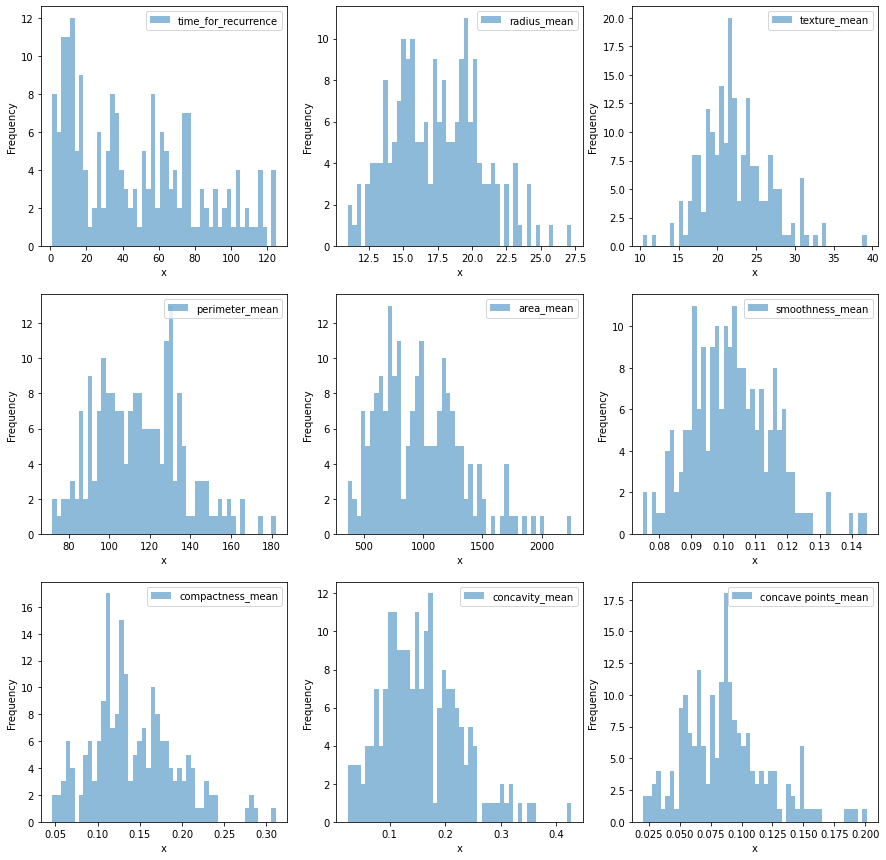

In [68]:
ncols = 3
nrows = 3
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 15))

counter = 2
for i in range(nrows):
    for j in range(ncols):
        ax = axes[i][j]
        if counter < len(df.columns):
            ax.hist(df[df.columns[counter]], bins=50, alpha=0.5, label='{}'.format(df.columns[counter]))
            ax.set_xlabel('x')
            ax.set_ylabel('Frequency')
            leg = ax.legend(loc='upper right')
        else:
            ax.set_axis_off()

        counter += 1

plt.show()

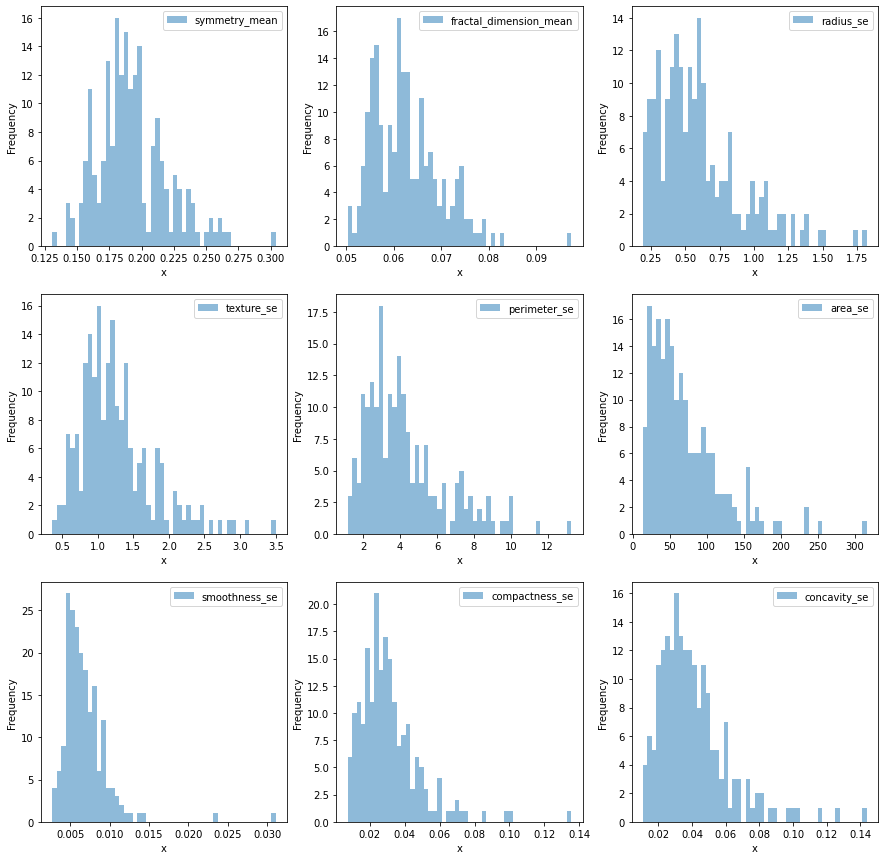

In [67]:
ncols = 3
nrows = 3
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 15))

counter = 11
for i in range(nrows):
    for j in range(ncols):
        ax = axes[i][j]
        if counter < len(df.columns):
            ax.hist(df[df.columns[counter]], bins=50, alpha=0.5, label='{}'.format(df.columns[counter]))
            ax.set_xlabel('x')
            ax.set_ylabel('Frequency')
            leg = ax.legend(loc='upper right')
        else:
            ax.set_axis_off()

        counter += 1

plt.show()

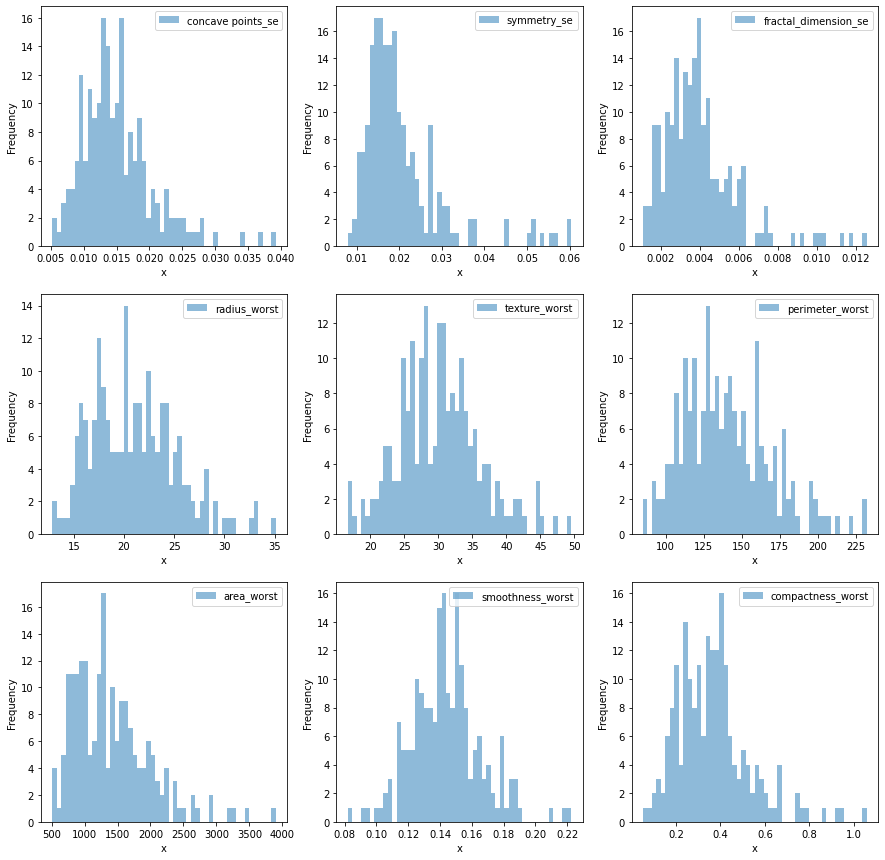

In [69]:
ncols = 3
nrows = 3
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 15))

counter = 20
for i in range(nrows):
    for j in range(ncols):
        ax = axes[i][j]
        if counter < len(df.columns):
            ax.hist(df[df.columns[counter]], bins=50, alpha=0.5, label='{}'.format(df.columns[counter]))
            ax.set_xlabel('x')
            ax.set_ylabel('Frequency')
            leg = ax.legend(loc='upper right')
        else:
            ax.set_axis_off()

        counter += 1

plt.show()

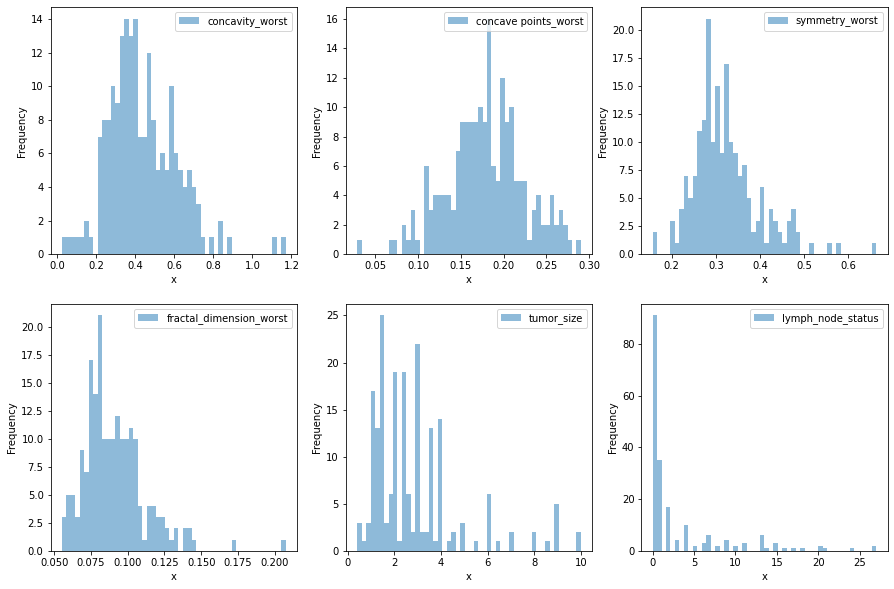

In [72]:
ncols = 3
nrows = 2
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 10))

counter = 29
for i in range(nrows):
    for j in range(ncols):
        ax = axes[i][j]
        if counter < len(df.columns):
            ax.hist(df[df.columns[counter]], bins=50, alpha=0.5, label='{}'.format(df.columns[counter]))
            ax.set_xlabel('x')
            ax.set_ylabel('Frequency')
            leg = ax.legend(loc='upper right')
        else:
            ax.set_axis_off()

        counter += 1

plt.show()

In [73]:
correlation_plot = df.corr()
correlation_plot.style.background_gradient(cmap = 'coolwarm')

,id,time_for_recurrence,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,tumor_size,lymph_node_status
id,1.000000,-0.135299,0.087392,0.037650,0.088027,0.070117,-0.039803,0.059505,0.051946,0.074368,-0.043264,0.024509,0.012313,0.037530,0.027710,0.004872,0.124037,0.100940,0.119171,0.158519,0.100087,0.152869,0.031900,0.007285,0.043099,0.008451,-0.057241,0.005048,0.043288,0.059702,-0.053920,0.003154,-0.132809,-0.075905
time_for_recurrence,-0.135299,1.000000,-0.344722,-0.264671,-0.346080,-0.344031,0.164793,0.010000,-0.139475,-0.171841,0.177311,0.269992,-0.214543,-0.230477,-0.231621,-0.244159,0.019775,-0.002386,-0.108648,-0.140754,0.011156,0.099203,-0.265115,-0.171125,-0.280596,-0.253930,0.212769,0.120516,0.009546,-0.026541,0.247678,0.288715,-0.133355,-0.122069
radius_mean,0.087392,-0.344722,1.000000,0.143456,0.995933,0.992855,-0.158239,0.159017,0.469518,0.664010,-0.051610,-0.416674,0.602035,0.079693,0.588927,0.710586,-0.036419,0.023647,0.154254,0.224771,0.019146,-0.072618,0.924183,-0.039439,0.915053,0.891489,-0.372894,-0.150712,0.038952,0.357869,-0.232142,-0.414340,0.172102,0.064372
texture_mean,0.037650,-0.264671,0.143456,1.000000,0.142033,0.140440,-0.192262,-0.039803,0.037165,0.006687,-0.165166,-0.145572,0.059168,0.382533,0.075025,0.068517,0.027119,0.063988,0.071920,0.010470,-0.094843,-0.020673,0.123028,0.862050,0.123674,0.117467,-0.113308,-0.006467,0.013635,-0.069921,-0.186850,-0.085847,0.027073,0.045667
perimeter_mean,0.088027,-0.346080,0.995933,0.142033,1.000000,0.990699,-0.102912,0.236721,0.533194,0.712766,-0.006512,-0.353560,0.612708,0.092256,0.609964,0.718581,-0.011788,0.080725,0.202027,0.254473,0.038613,-0.019514,0.921552,-0.039728,0.923659,0.889344,-0.331667,-0.092041,0.096790,0.410000,-0.206949,-0.364022,0.166489,0.065425
area_mean,0.070117,-0.344031,0.992855,0.140440,0.990699,1.000000,-0.141470,0.163176,0.475862,0.667530,-0.060785,-0.397733,0.623019,0.084288,0.609887,0.740830,-0.032969,0.020395,0.144443,0.213582,0.009121,-0.071906,0.932381,-0.032122,0.925335,0.914166,-0.345111,-0.141358,0.046641,0.365026,-0.234294,-0.395026,0.174491,0.065757
smoothness_mean,-0.039803,0.164793,-0.158239,-0.192262,-0.102912,-0.141470,1.000000,0.666559,0.623867,0.545734,0.540761,0.744890,0.094728,0.153848,0.099518,0.037955,0.344678,0.372393,0.375011,0.223510,0.223723,0.486112,-0.115092,-0.106172,-0.064664,-0.106691,0.745400,0.447849,0.499438,0.531015,0.308964,0.535751,-0.084376,0.028521
compactness_mean,0.059505,0.010000,0.159017,-0.039803,0.236721,0.163176,0.666559,1.000000,0.836015,0.716438,0.666822,0.735474,0.251568,0.082994,0.318684,0.233326,0.212552,0.714122,0.599020,0.384747,0.350009,0.648248,0.183277,-0.047665,0.276994,0.168275,0.452067,0.764824,0.743333,0.761044,0.429953,0.611315,-0.060199,0.002660
concavity_mean,0.051946,-0.139475,0.469518,0.037165,0.533194,0.475862,0.623867,0.836015,1.000000,0.909990,0.524861,0.449928,0.427031,0.181984,0.468426,0.449059,0.297014,0.564196,0.676804,0.434928,0.304383,0.504069,0.437961,-0.032081,0.514336,0.421021,0.319247,0.483300,0.702673,0.767571,0.212976,0.302868,-0.010244,0.060008
concave points_mean,0.074368,-0.171841,0.664010,0.006687,0.712766,0.667530,0.545734,0.716438,0.909990,1.000000,0.429968,0.268210,0.555034,0.179486,0.580562,0.586508,0.177402,0.376339,0.463710,0.426638,0.238520,0.350050,0.630309,-0.094163,0.682749,0.604029,0.174917,0.286599,0.471429,0.764803,0.089804,0.101327,0.050040,0.056339


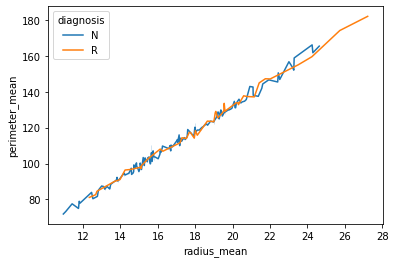

In [10]:
sns.lineplot(x=df["radius_mean"],y=df["perimeter_mean"], hue=df["diagnosis"])

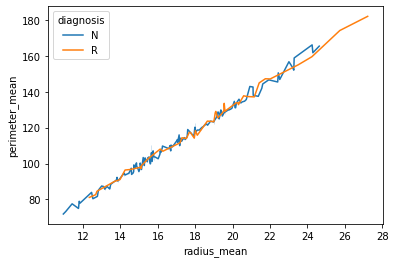

In [13]:
##Trying out differenet paramters

sns.lineplot(x=df["radius_mean"],y=df["perimeter_mean"], hue=df["diagnosis"])

In [ ]:
sns.countplot(df['diagnosis'])

In [17]:
#sns.barplot(df['diagnosis'],df['area_mean'])

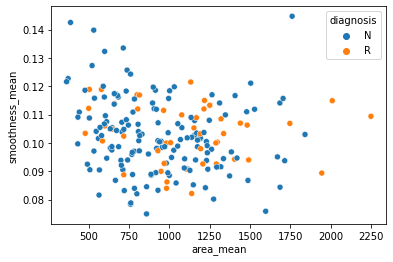

In [18]:
sns.scatterplot(x = df['area_mean'],y= df['smoothness_mean'],hue=df['diagnosis'])

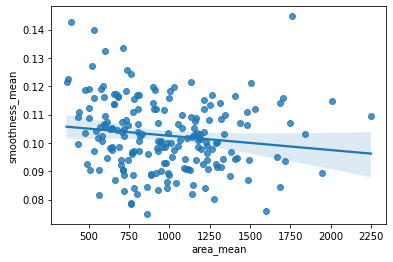

In [19]:
sns.regplot(x = df['area_mean'],y= df['smoothness_mean'])

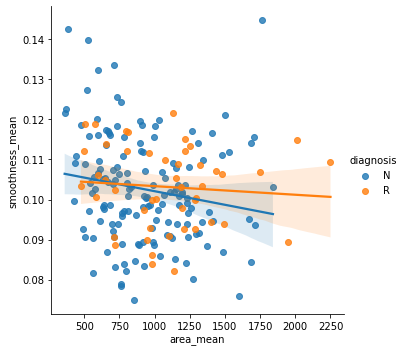

In [20]:
sns.lmplot(x='area_mean',y='smoothness_mean',hue='diagnosis',data=df)

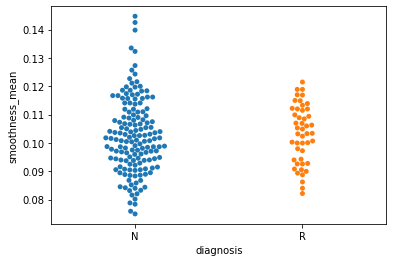

In [23]:
sns.swarmplot(x=df['diagnosis'],y=df['smoothness_mean'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


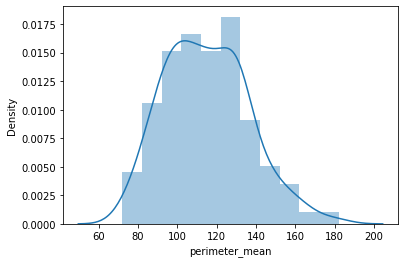

In [25]:
sns.distplot(df['perimeter_mean'])

/opt/homebrew/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='smoothness_mean', ylabel='Density'>

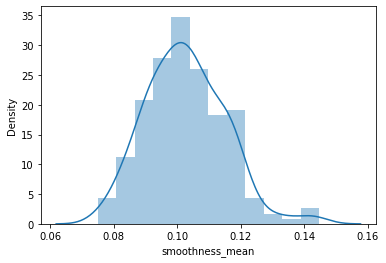

In [74]:
sns.distplot(df['smoothness_mean'])

/opt/homebrew/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


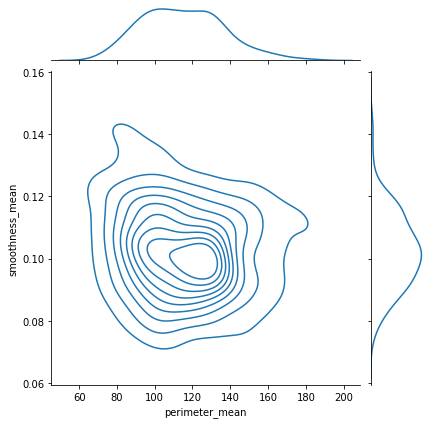

In [75]:
sns.jointplot(df['perimeter_mean'],df['smoothness_mean'],kind='kde')

## Understanding class imbalance

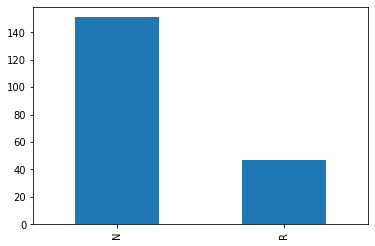

In [76]:
df['diagnosis'].value_counts().plot(kind = 'bar')
plt.show()

## Data Preprocessing

In [84]:
columns_to_be_scaled = df.columns[2:]

In [91]:
df_scaled = df.select_dtypes(exclude = ['object'])
df_scaled.drop(columns = ['id'], inplace=True)
df_scaled.columns

/opt/homebrew/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Index(['time_for_recurrence', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'tumor_size',
       'lymph_node_status'],
      dtype='object')

In [92]:
std_scaler = StandardScaler()
df_scaled[columns_to_be_scaled] = std_scaler.fit_transform(df[columns_to_be_scaled])

/opt/homebrew/lib/python3.9/site-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [93]:
df_scaled = pd.concat([df['id'], df['diagnosis'], df_scaled], axis = 1)
df_scaled.head()

,id,diagnosis,time_for_recurrence,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,tumor_size,lymph_node_status
0,119513,N,-0.457658,0.192688,1.241770,0.123934,0.122300,-0.623774,-0.784542,-0.676803,...,-0.022477,0.053105,-1.112648,-1.054732,-0.708404,-1.370815,-0.743009,-0.459226,1.113530,0.341446
1,8423,N,0.415051,0.183175,-2.774630,0.372418,0.088138,1.258416,2.711439,2.043606,...,1.535510,1.050496,0.832831,1.837343,1.589132,1.922113,1.823321,1.329259,0.078903,-0.211194
2,842517,N,2.015017,1.254939,-1.127953,1.061610,1.147186,-1.146560,-0.477137,-0.436726,...,0.650684,0.930741,-1.144541,-0.123520,-0.550192,0.541923,1.467183,-0.007488,-0.179753,-0.579621
3,843483,N,2.218649,-1.900104,-0.442226,-1.747667,-1.662423,3.187841,2.838018,1.209726,...,-1.439240,-1.432374,3.001561,3.064487,1.444778,1.746815,4.540377,3.891002,-0.438410,-0.579621
4,843584,R,-0.574019,0.912482,-1.850998,0.949089,0.930821,-0.190654,-0.197860,0.593194,...,0.411261,0.290905,-0.297096,-0.978914,-0.211827,-0.361191,-1.160505,-0.665207,0.337560,-0.579621


## Modelling

In [94]:
X = df_scaled.drop(['id','diagnosis'],axis=1)
y = df_scaled['diagnosis']

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=349)

In [95]:
X_train

,time_for_recurrence,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,tumor_size,lymph_node_status
97,0.473231,-0.114889,-0.745439,-0.068289,-0.213634,0.914162,0.292381,0.493754,0.657702,0.743435,...,-0.237611,-0.369460,1.201879,0.173024,0.375982,1.675809,-0.166785,-0.010329,-0.697067,0.341446
161,-1.155825,2.164986,-0.824740,2.097742,2.775615,-1.064900,-0.583623,0.233788,0.601474,-1.229707,...,3.187186,4.273624,-1.299450,-1.148892,-0.837167,0.016031,-1.197853,-1.337132,0.078903,0.157233
150,-0.894012,0.107074,1.342063,0.114557,0.032908,-0.217073,-0.225989,0.192591,-0.113806,-0.783924,...,0.175307,0.054816,-0.174080,0.067858,1.173393,0.404348,-0.349523,-0.003700,-0.697067,0.709873
148,-0.981283,-0.045129,0.733305,-0.115173,-0.117409,-1.550858,-0.637871,-0.509175,-0.870517,-1.682799,...,-0.261901,-0.206935,-0.014614,0.287973,0.386376,-0.108230,-0.979101,-0.539251,3.182784,-0.579621
185,-0.864922,-1.199336,0.565372,-1.181779,-1.141155,0.225654,-0.230007,-0.570260,-0.673127,-0.498914,...,-1.132847,-1.185164,0.523012,-0.083166,-0.553079,-0.219178,-0.660311,0.408263,-0.438410,-0.579621
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,-0.981283,-0.574669,1.052845,-0.703565,-0.597966,-1.907922,-1.813244,-1.682858,-1.716896,-1.269901,...,-0.803206,-0.646608,-1.559151,-1.636509,-1.792213,-2.142567,-0.572276,-1.280783,-0.438410,-0.211194
31,0.851405,-1.246899,-0.339600,-1.240384,-1.169624,-0.086577,-0.344530,-0.709477,-0.958410,-0.758346,...,-1.146727,-1.136920,0.778157,0.350951,0.382911,1.043407,-0.569609,0.770505,-0.179753,-0.579621
47,1.462301,0.677835,-1.582772,0.616214,0.529408,0.417795,0.643988,1.121650,0.971395,2.515609,...,0.452900,0.390131,0.431889,-0.158983,0.838492,0.914708,1.974047,0.302194,0.078903,-0.579621
42,-0.370387,-1.002740,-0.029391,-0.864376,-0.923367,0.177618,1.168385,0.813384,-0.007268,0.078413,...,-0.737278,-0.762086,0.914842,1.587267,1.475381,-0.006158,-0.520256,1.059353,-0.697067,-0.579621


In [96]:
model = [
    ["LogisticRegression",LogisticRegression()],
    ["RandomForestClassifier",RandomForestClassifier()],
    ["DecisionTreeClassifier",DecisionTreeClassifier()],
    ["GaussianNB",GaussianNB()],
    ["KNeighborsClassifier",KNeighborsClassifier()],
    ["SupportVectorMachine",SVC()]
    ]

In [98]:
accuracy_score1 = []
for i in model:
    ml_model = i[1]
    ml_model.fit(X_train,y_train)
    predict = ml_model.predict(X_test)
    accuracy_score1.append([i[0], accuracy_score(predict,y_test)])

In [99]:
main_score = pd.DataFrame(accuracy_score1)
main_score.columns = ["Model","Score"]

In [100]:
main_score

,Model,Score
0,LogisticRegression,0.800000
1,RandomForestClassifier,0.816667
2,DecisionTreeClassifier,0.650000
3,GaussianNB,0.666667
4,KNeighborsClassifier,0.816667
5,SupportVectorMachine,0.750000


In [ ]:
xgboost
catboost
adaboost
neuralnet (FNN)